# The intra-EU politics of brain drain - methodological annex

[Jacob Hasselbalch](https://www.cbs.dk/en/research/departments-and-centres/department-of-business-and-politics/staff/jahadbp)  
Copenhagen Business School  
[@jhasselbalch](https://twitter.com/jhasselbalch)  


**Introduction**

The purpose of this analysis is to explore a hand-coded set of Parliamentary Questions posed in the European Parliament concerning the topic of 'brain drain' as an intra-European Union phenomenon. The topic has become increasingly controversial in recent years with the growing politicization of the negative externalities of European labor mobility. 

The following table displays the number of questions asked during each of the last four parliamentary periods mentioning 'brain drain' anywhere in the question and answer text. The questions were downloaded from the [European Parliament's database](http://www.europarl.europa.eu/plenary/en/parliamentary-questions.html). 

|                            |     Stage  1    | Stage 1 (continued) |     Stage 2     |     Stage 3     |             |
|:--------------------------:|:---------------:|:-------------------:|:---------------:|:---------------:|:-----------:|
|    Parliamentary period    |    1999-2004    |      2004-2009      |    2009-2014    |    2014-2019    |    Total    |
|     Number of questions    |        5        |          26         |        43       |        32       |     105     |

Going through these questions in the [Discourse Network Analyzer](https://github.com/leifeld/dna) software, I identified a total of 675 statements uttered by 133 different persons (Members of the European Parliament and Commissioners). Each statement was coded according to an iteratively developed coding scheme that exhausted all the different ways that brain drain was presented as a problem, as well as the solutions offered to the problem. 

The analysis here serves as a methodological appendix to a paper that is being prepared for submission. There are two parts to the analysis - first, I look at changes in the prevalence of each individual frame over time in communications from both MEPs and Commissioners (plotted as a facet grid with the Seaborn package); second, I employ a network analytic approach to study changes in connections between frames and groups (using the NetworkX package). Both analyses are based on the same dataset. 

**Table of contents:**

- [Reading in the data](#Reading-in-the-data)  


- [Part 1: Change in frame usage over time](#Part-1:-Change-in-frame-usage-over-time)
    - [Preparing the data](#Preparing-the-data)
    - [Plotting: Barplots](#Plotting:-Barplots)
    - [Plotting: Facet grid](#Plotting:-Facet-grid)  


- [Part 2: Network analysis](#Part-2:-Network-analysis)
    - [Creating a graph object](#Creating-a-graph-object)
    - [Storing node attributes](#Storing-node-attributes)
    - [Drawing with nxviz](#Drawing-with-nxviz)
    - [Drawing with matplotlib](#Drawing-with-matplotlib)
    - [Filtering most important nodes](#Filtering-most-important-nodes)
    - [Drawing as subplots](#Drawing-as-subplots)



## Reading in the data

I read the data using Pandas read_excel function and load it to check that it looks correct.

In [4]:
import pandas as pd
df = pd.read_excel("data/braindrain2.xlsx")
df

,ID,ARTICLE TITLE,DATE,STAGE,PERSON,ORGANIZATION,MEP,COUNTRY,CATEGORY,TEXT
0,2,E-0148/99,1999-02-11 00:00:00,1,Joaquin Sisó Cruellas (EPP),EPP,Y,Spain,Problem - Third country emigration,Participation in international education and t...
1,35,E-0148/99,1999-02-11 00:00:00,1,Joaquin Sisó Cruellas (EPP),EPP,Y,Spain,Problem - Working conditions,It would appear that the presence of centres o...
2,1,E-0148/99,1999-02-11 00:00:00,1,Joaquin Sisó Cruellas (EPP),EPP,Y,Spain,Solution - R&D,"Once abroad, European scientists often find it..."
3,36,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Increase mobility,The Commission is concerned with the trends sh...
4,3,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Refutation,The success of this scholarship scheme proves ...
5,4,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Member States,"In line with the subsidiarity principle, actio..."
6,5,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Private sector,"As is also indicated in the IPTS report, the E..."
7,37,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - R&D,The Commission will continue its efforts to st...
8,7,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Circular migration,With regard to the brain drain within the Comm...
9,6,E-0148/99,1999-02-11 00:00:00,1,Édith Cresson,DG Research,N,France,Solution - Member States,The Commission also encourages the cohesion Me...


## Part 1: Change in frame usage over time

### Preparing the data

I start by subsetting the dataframe into three dataframes - one for each stage of the policy debate. 

In [6]:
df1 = df[df['STAGE'] == 1]
df2 = df[df['STAGE'] == 2]
df3 = df[df['STAGE'] == 3]

Subsetting again by MEP/Commissioner status

In [7]:
df1_mep = df1[df1['MEP'] == 'Y']
df1_com = df1[df1['MEP'] == 'N']
df2_mep = df2[df2['MEP'] == 'Y']
df2_com = df2[df2['MEP'] == 'N']
df3_mep = df3[df3['MEP'] == 'Y']
df3_com = df3[df3['MEP'] == 'N']

Extracting series of counts of each frame occurrence for each subsetted dataframe

In [8]:
val1_mep = df1_mep['CATEGORY'].value_counts()
val1_com = df1_com['CATEGORY'].value_counts()
val2_mep = df2_mep['CATEGORY'].value_counts()
val2_com = df2_com['CATEGORY'].value_counts()
val3_mep = df3_mep['CATEGORY'].value_counts()
val3_com = df3_com['CATEGORY'].value_counts()

Calculating those series into percentages

In [9]:
perc1_mep = 100 * val1_mep / len(df1_mep)
perc1_com = 100 * val1_com / len(df1_com)
perc2_mep = 100 * val2_mep / len(df2_mep)
perc2_com = 100 * val2_com / len(df2_com)
perc3_mep = 100 * val3_mep / len(df3_mep)
perc3_com = 100 * val3_com / len(df3_com)

Turning the percentage series back into dataframes

In [10]:
df_mep1 = pd.DataFrame({'Frames': perc1_mep.index, 'MEP 1': perc1_mep.values})
df_com1 = pd.DataFrame({'Frames': perc1_com.index, 'COM 1': perc1_com.values})
df_mep2 = pd.DataFrame({'Frames': perc2_mep.index, 'MEP 2': perc2_mep.values})
df_com2 = pd.DataFrame({'Frames': perc2_com.index, 'COM 2': perc2_com.values})
df_mep3 = pd.DataFrame({'Frames': perc3_mep.index, 'MEP 3': perc3_mep.values})
df_com3 = pd.DataFrame({'Frames': perc3_com.index, 'COM 3': perc3_com.values})

Setting the index of each dataframe to the 'Frames' column.

In [11]:
df_mep1 = df_mep1.set_index('Frames')
df_com1 = df_com1.set_index('Frames')
df_mep2 = df_mep2.set_index('Frames')
df_com2 = df_com2.set_index('Frames')
df_mep3 = df_mep3.set_index('Frames')
df_com3 = df_com3.set_index('Frames')

Merging the re-indexed dataframes one-by-one to get the final dataframe.

In [12]:
result1 = df_mep1.join(df_com1, how='outer')
result2 = result1.join(df_mep2, how='outer')
result3 = result2.join(df_com2, how='outer')
result4 = result3.join(df_mep3, how='outer')
result5 = result4.join(df_com3, how='outer')

In [14]:
result5 

# This dataframe shows the prevalence of each frame in MEP/Commissioner discourse for each stage of the policy debate.
# The sum of each column is 100.

,MEP 1,COM 1,MEP 2,COM 2,MEP 3,COM 3
Frames,,,,,,
Problem - Austerity,NaN,NaN,3.007519,0.584795,4.494382,NaN
Problem - Competitiveness,8.196721,0.869565,NaN,NaN,NaN,NaN
Problem - Demographics,1.639344,0.869565,0.751880,NaN,4.494382,2.830189
Problem - Development,18.032787,6.086957,6.015038,2.339181,2.247191,NaN
Problem - Eastern drain,4.918033,NaN,4.511278,0.584795,12.359551,1.886792
Problem - Economic crisis,NaN,NaN,8.270677,1.169591,10.112360,NaN
Problem - R&D,11.475410,1.739130,6.766917,1.169591,6.741573,NaN
Problem - Shortages,6.557377,5.217391,4.511278,4.093567,6.741573,3.773585
Problem - Skills and training,1.639344,NaN,4.511278,1.169591,1.123596,NaN


### Plotting: Barplots

Importing packages for plotting

In [17]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
sns.set(style="whitegrid", color_codes=True)

Subsetting the final dataframe according to each stage of the policy debate.

In [18]:
stage_1 = result5.iloc[:,0:2]
stage_2 = result5.iloc[:,2:4]
stage_3 = result5.iloc[:,4:6]

These can be plotted with Pandas as below. 

<IPython.core.display.Javascript object>


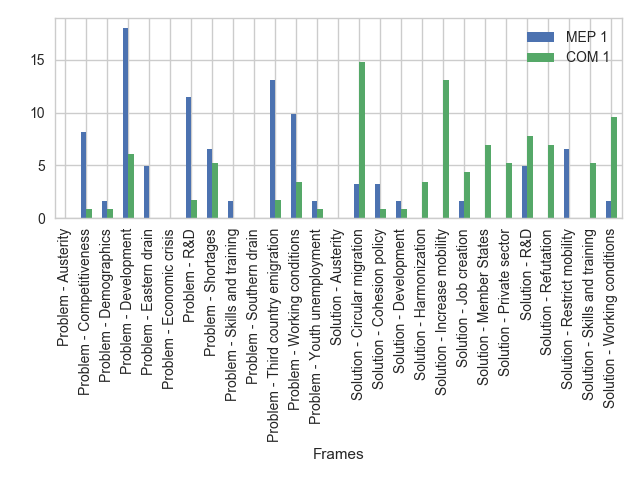

In [19]:
stage_1.plot.bar()
plt.tight_layout()

<IPython.core.display.Javascript object>


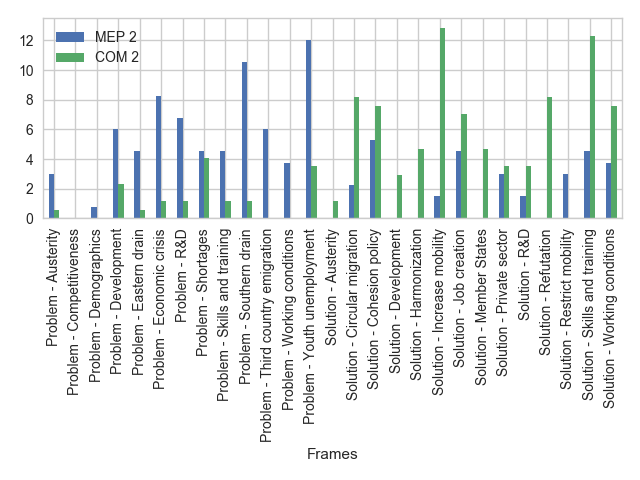

In [20]:
stage_2.plot.bar()
plt.tight_layout()

<IPython.core.display.Javascript object>


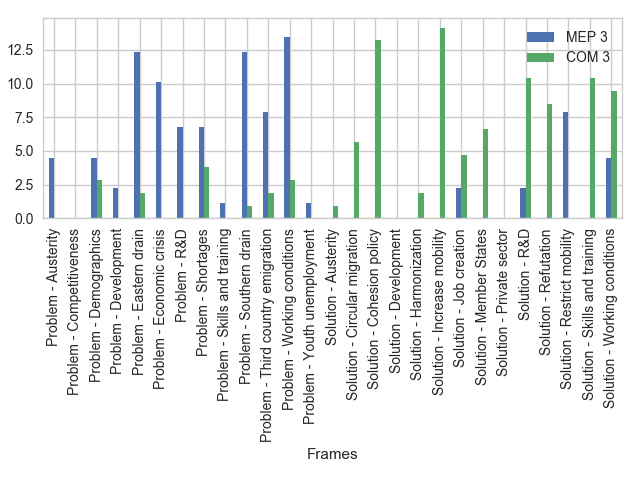

In [21]:
stage_3.plot.bar()
plt.tight_layout()

Stacking the bars is also an option, for example: 

<IPython.core.display.Javascript object>


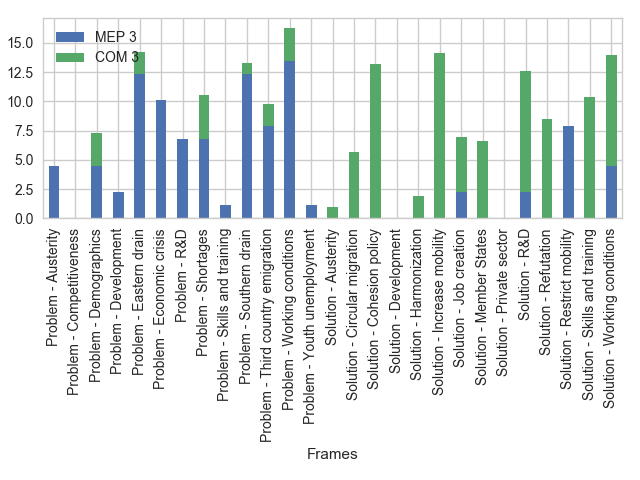

In [22]:
stage_3.plot.bar(stacked=True)
plt.tight_layout()

### Plotting: Facet grid

But I'm not satisfied with the readability of these graphs. I think a Facet Grid where I go frame by frame and show the evolution of the usage of each frame by each group over each stage of the debate is more helpful. As an example, see below.

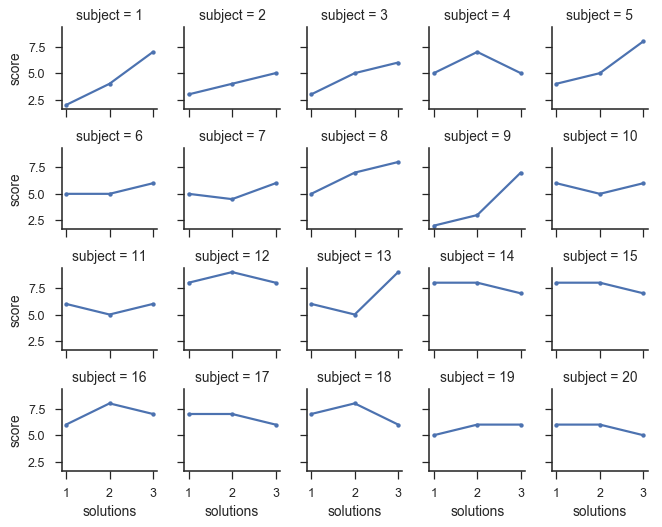

In order to get this sort of chart for the brain drain data, I need to reorganize the final dataframe (result5) in the below format. I did this by hand (using the values in the result5 dataframe), as I'm not sure how to achieve this in Python. 

In [23]:
df_facet = pd.read_excel('data/bd_facetgrid.xlsx')
df_facet

,Frame,Group,Stage,Percentage
0,Problem - Austerity,MEP,1,0.00
1,Problem - Austerity,MEP,2,3.00
2,Problem - Austerity,MEP,3,4.49
3,Problem - Austerity,EC,1,0.00
4,Problem - Austerity,EC,2,0.58
5,Problem - Austerity,EC,3,0.00
6,Problem - Competitiveness,MEP,1,8.20
7,Problem - Competitiveness,MEP,2,0.00
8,Problem - Competitiveness,MEP,3,0.00
9,Problem - Competitiveness,EC,1,0.87


The formatted dataframe is easily turned into a facet grid with the Seaborn package. 

<IPython.core.display.Javascript object>


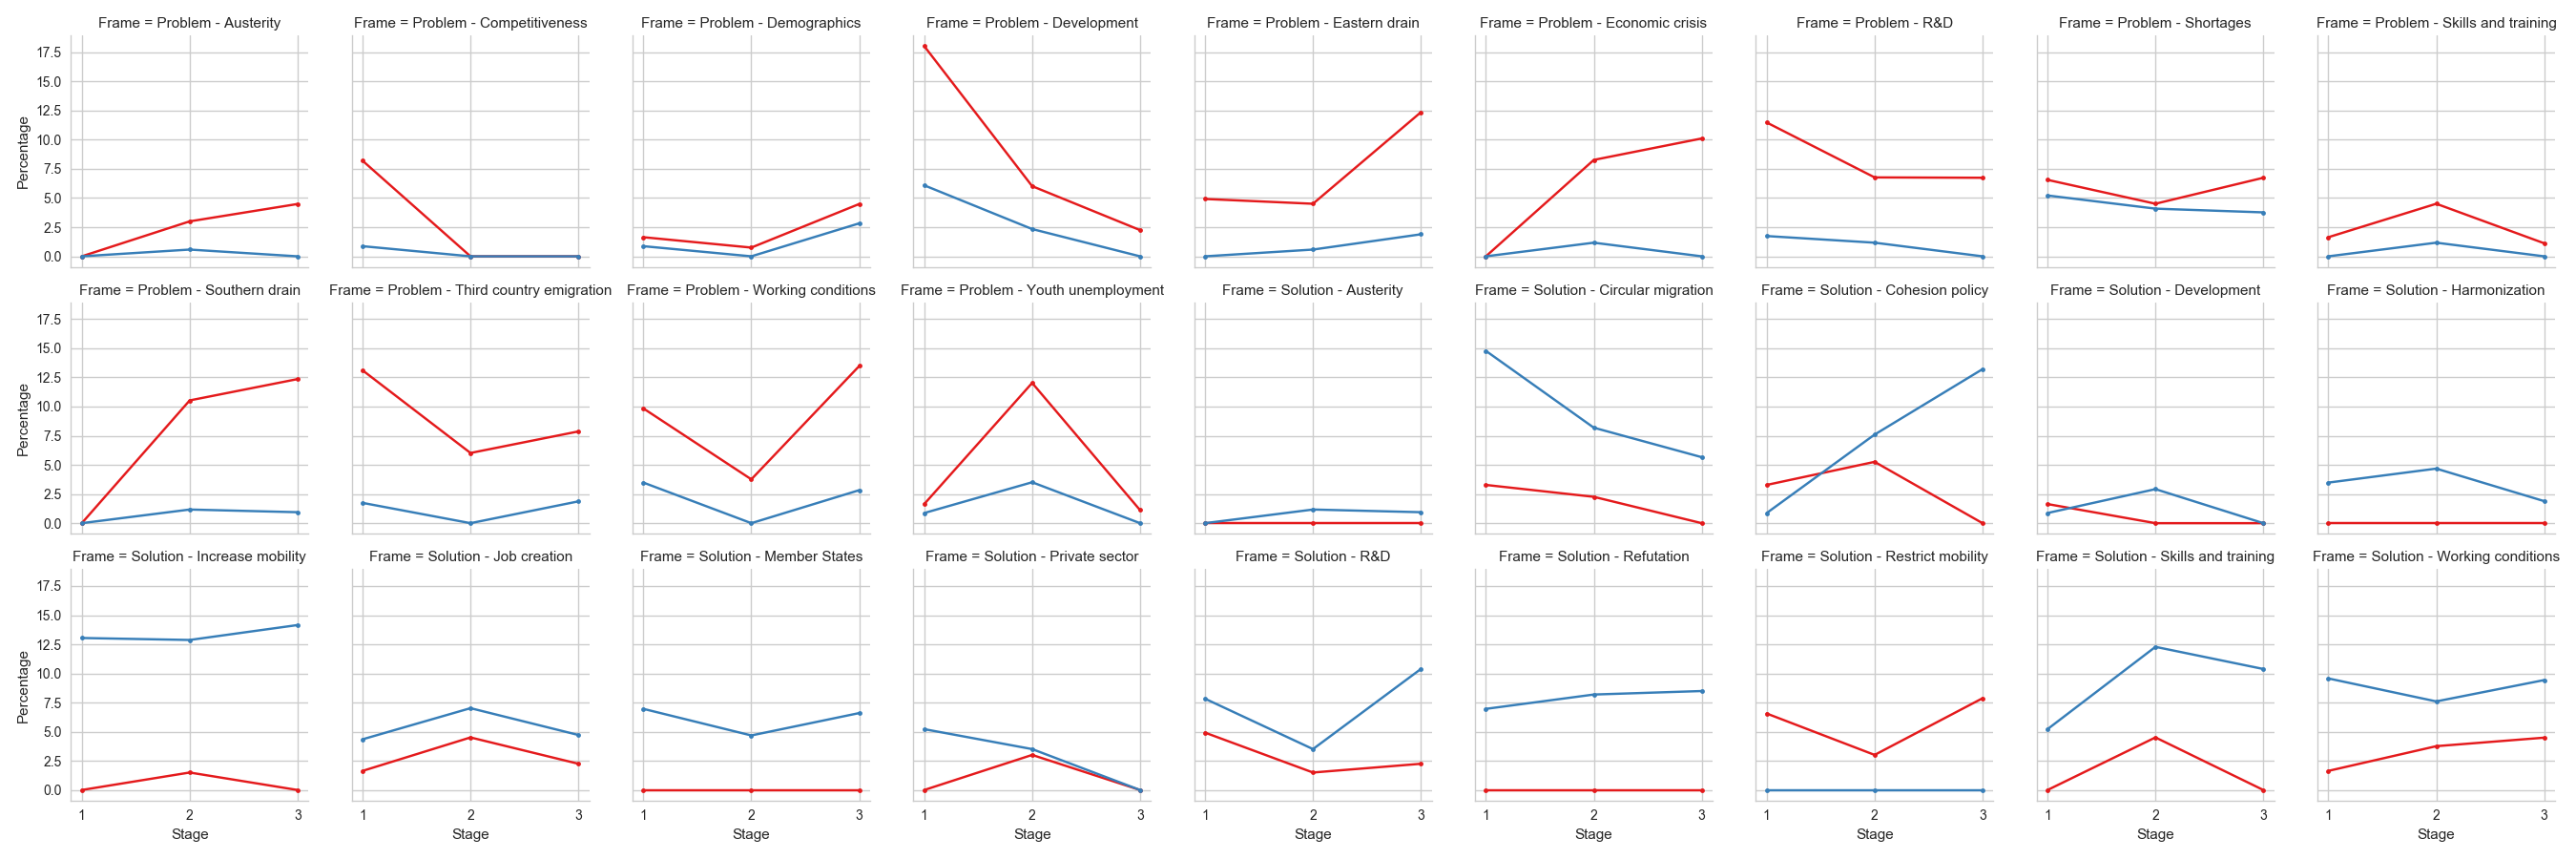

In [24]:
g = sns.FacetGrid(df_facet, col="Frame", hue="Group", palette='Set1', col_wrap=9, size=3.0)
g = g.map(plt.plot, "Stage", "Percentage", marker=".").set(xticks=[1, 2, 3])

In [21]:
# exporting here
g.savefig('exports/facetgrid.pdf')

This figure is still too large. I can subset the dataframe and create two figures - one for problems and one for solutions.

In [25]:
df_problems = df_facet.iloc[0:78,:]
df_problems.head()

,Frame,Group,Stage,Percentage
0,Problem - Austerity,MEP,1,0.00
1,Problem - Austerity,MEP,2,3.00
2,Problem - Austerity,MEP,3,4.49
3,Problem - Austerity,EC,1,0.00
4,Problem - Austerity,EC,2,0.58


In [26]:
df_solutions = df_facet.iloc[78:,:]
df_solutions.head()

,Frame,Group,Stage,Percentage
78,Solution - Austerity,MEP,1,0.00
79,Solution - Austerity,MEP,2,0.00
80,Solution - Austerity,MEP,3,0.00
81,Solution - Austerity,EC,1,0.00
82,Solution - Austerity,EC,2,1.17


Now I create two final facet grids using the problem and solution dataframes. 

<IPython.core.display.Javascript object>


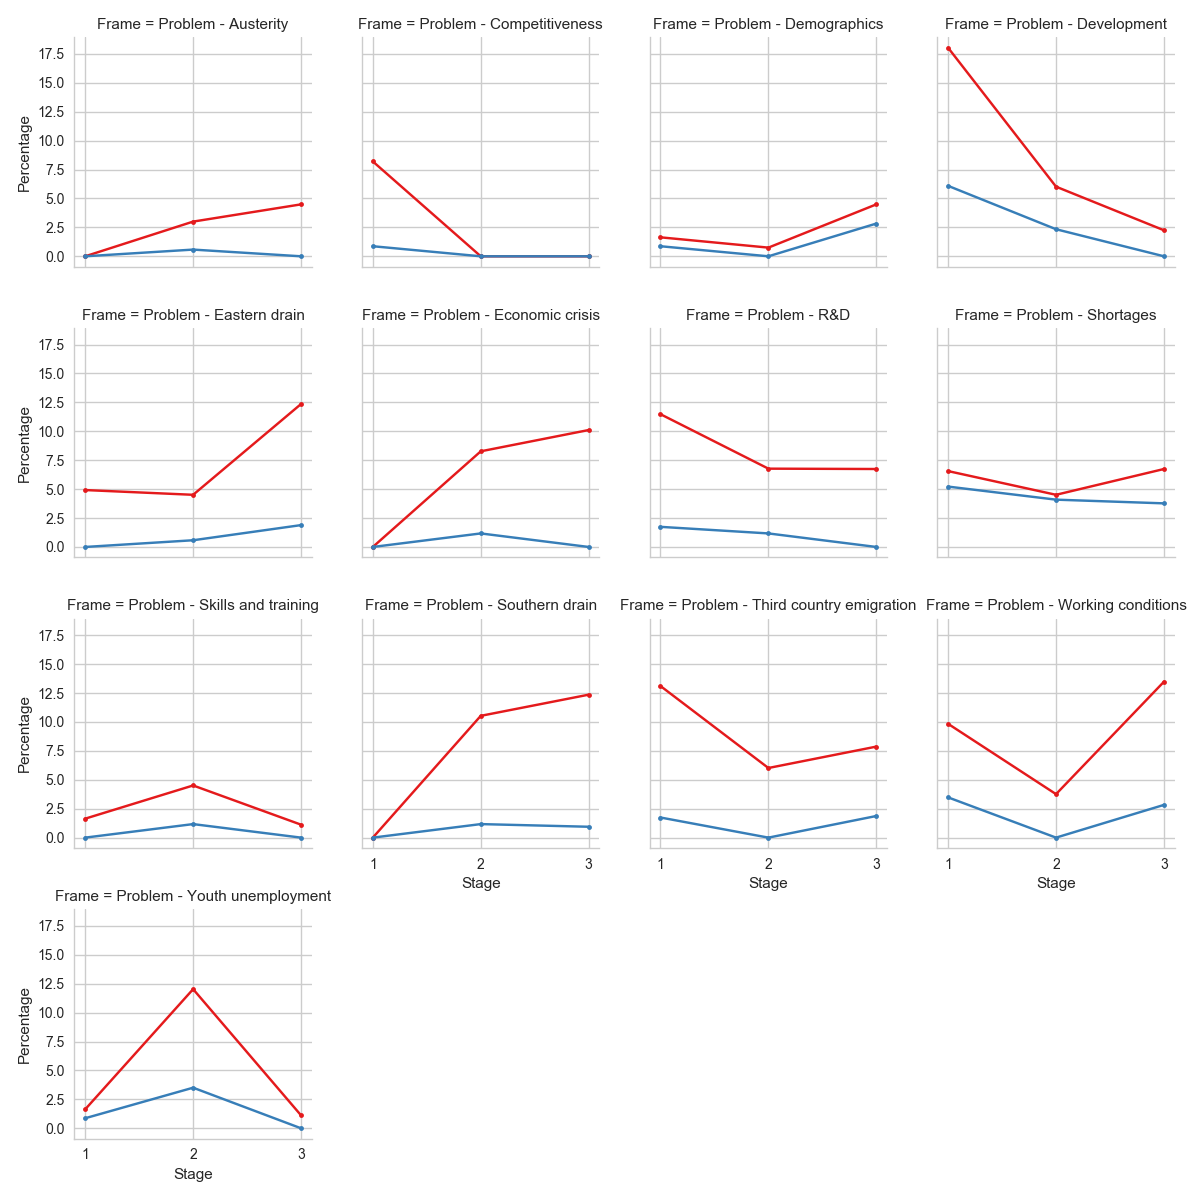

In [27]:
g1 = sns.FacetGrid(df_problems, col="Frame", hue="Group", palette='Set1', col_wrap=4, size=3.0)
g1.map(plt.plot, "Stage", "Percentage", marker=".").set(xticks=[1, 2, 3])

<IPython.core.display.Javascript object>


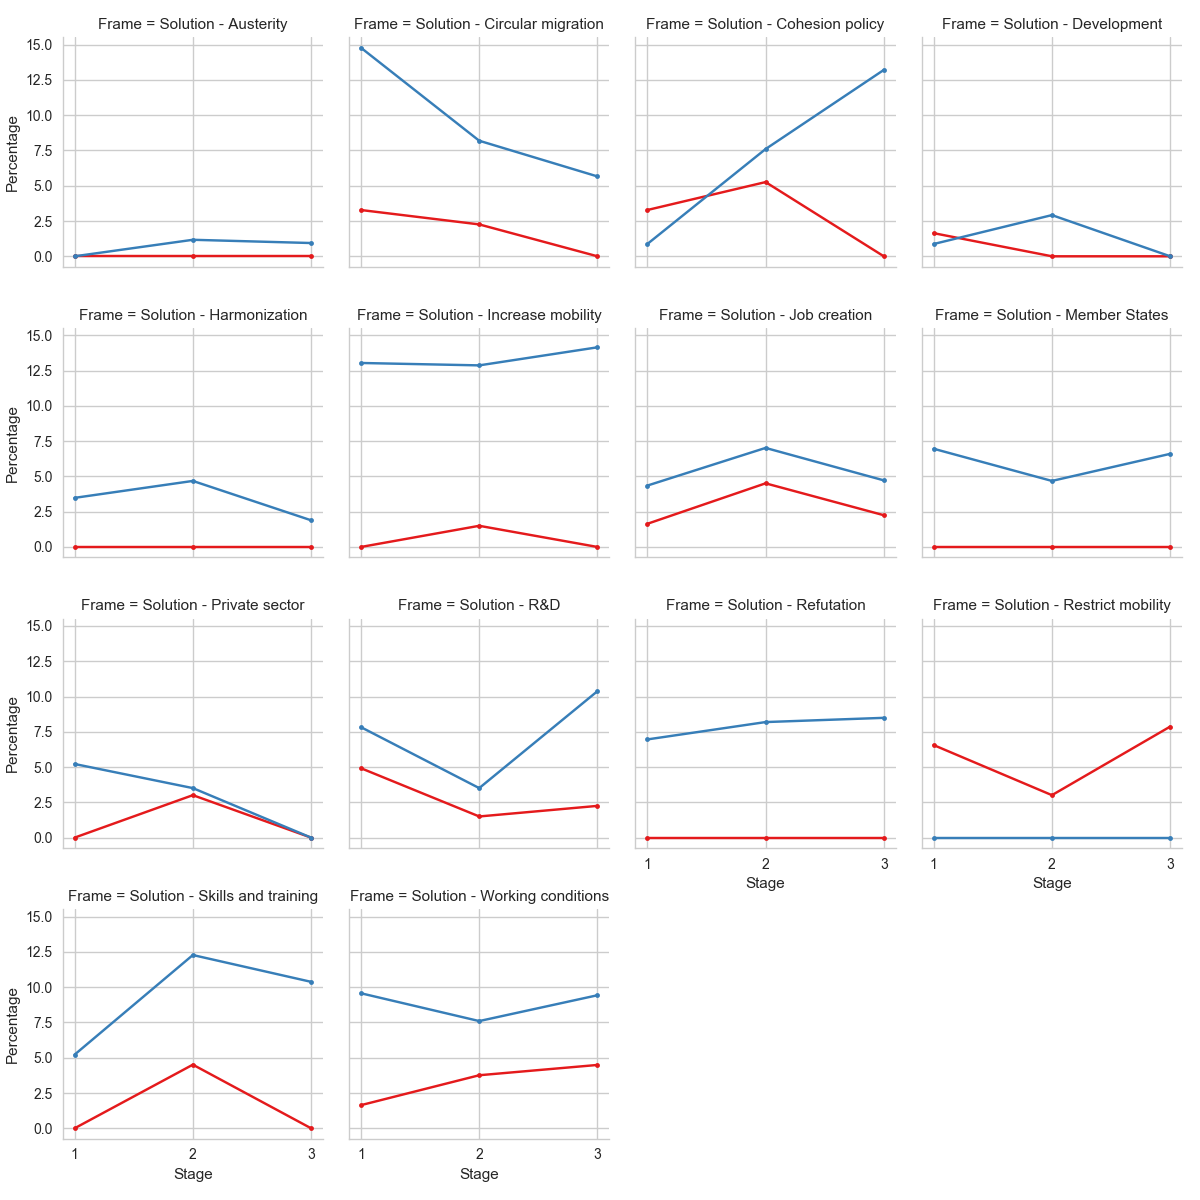

In [28]:
g2 = sns.FacetGrid(df_solutions, col="Frame", hue="Group", palette='Set1', col_wrap=4, size=3.0)
g2.map(plt.plot, "Stage", "Percentage", marker=".").set(xticks=[1, 2, 3])

In [26]:
# Ready for export
g1.savefig('exports/problems.pdf')
g2.savefig('exports/solutions.pdf')

## Part 2: Network analysis

The first part of the analysis provides a good overview of the importance of individual frames and how that changes over time - but we can deepen the analysis by showing who is doing the talking, when. I start by importing the required packages for NetworkX (including bipartite algorithms, as this is a two-mode network) as well as Pandas for dataframe management.  

In [32]:
import networkx as nx
from networkx.algorithms import bipartite

### Creating a graph object

With NetworkX, I now create a graph object by using the function to read from a Pandas dataframe, identified as an edgelist that displays connections from organizations to categories. Organizations here are the Parliamentary groups asking the questions or Commission services answering the questions, and categories are a coding scheme of frames that identify brain drain as a specific type of problem and suggested solutions to the problem. I also read the dates associated with each occurence of a statement to timestamp all the edges. The "STAGE" attribute groups dates into stages 1, 2, or 3 as identified in the table showing the total amount of questions. I can also store the actual text of each statement as metadat for each edge.

The printed info tells us that the amount of edges corresponds to the number of statements I identified (the number of rows in the dataframe), and the amount of nodes corresponds to the number of organizations plus frames. I use MultiGraph to allow several edges to exist between the same nodes. 

In [33]:
G = nx.from_pandas_edgelist(df,
                            source="ORGANIZATION",
                            target="CATEGORY",
                            edge_attr=["STAGE", "TEXT", "DATE"],
                            create_using=nx.MultiGraph(),
                            )

print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 53
Number of edges: 675
Average degree:  25.4717


The graph should be a two-mode network where all organizations connect only to categories. We can check for this with the nx.is_bipartite() function. If it returns "True", the graph is bipartite.

In [34]:
nx.is_bipartite(G)

True

We can also check to see whether the edges are correctly timestamped by listing the edges and reading their associated data. (Slicing to just check the first 5 entries.)

In [35]:
list(G.edges(data=True))[:5]

[('EPP',
  'Problem - Third country emigration',
  {'DATE': Timestamp('1999-02-11 00:00:00'),
   'STAGE': 1,
   'TEXT': 'Participation in international education and training on the one hand, and the demand from companies for qualified staff with international experience on the other, have stimulated interest in working abroad amongst young scientists. The USA is the principal destination of European emigrants, and most of them have executive and management posts. It should also be stressed that approximately 50 % of all Europeans who complete a degree in the USA remain in that country for a longer period, and even for good, with European Ph.Ds staying there much longer on average than their Korean or Japanese counterparts'}),
 ('EPP',
  'Problem - Third country emigration',
  {'DATE': Timestamp('2003-04-02 00:00:00'),
   'STAGE': 1,
   'TEXT': 'According to a recent Commission report, nearly 75 % of European PhD students in the United States envisage staying there after gaining their 

### Storing node attributes

I should find out which nodes are categories and which are persons. I can use NetworkX's bipartite algorithms for this. 

In [36]:
bottom_nodes, top_nodes = bipartite.sets(G)
print(list(bottom_nodes))
print(list(top_nodes))

['DG Regio', 'EPP', 'DG Research', 'ALDE', 'DG Home', 'DG Sanco', 'DG Trade', 'ITS', 'European Council', 'ECR', 'Greens/EFA', 'EFD', 'European Commission', 'DG EAC', 'DG Employment', 'ENF', 'DG Justice', 'UEN', 'GUE/NGL', 'EFDD', 'DG Development', 'S&D', 'External Action', 'Independent', 'DG Enlargement', 'DG Ecfin']
['Solution - Refutation', 'Problem - Southern drain', 'Solution - Job creation', 'Solution - Restrict mobility', 'Solution - R&D', 'Problem - Economic crisis', 'Problem - Skills and training', 'Problem - R&D', 'Problem - Shortages', 'Problem - Eastern drain', 'Solution - Skills and training', 'Problem - Competitiveness', 'Solution - Member States', 'Problem - Demographics', 'Solution - Austerity', 'Solution - Private sector', 'Solution - Harmonization', 'Problem - Working conditions', 'Problem - Youth unemployment', 'Solution - Cohesion policy', 'Solution - Working conditions', 'Problem - Third country emigration', 'Problem - Austerity', 'Solution - Increase mobility', 'So

Looking at the lists, we can see that bottom_nodes are organizations and top_nodes are frames. 

In [42]:
organizations = bottom_nodes
frames = top_nodes
print('Number of organizations: ' + str(len(organizations)))
print('Number of frames: ' + str(len(frames)))

Number of organizations: 26
Number of frames: 27


Here I set a dummy variable to 1 or 0 (using the bipartite.color function) depending on the bipartite partition of each node. This will later be stored as a node attribute. 

In [43]:
bipartite = bipartite.color(G)
print(bipartite)

{'EPP': 1, 'Problem - Third country emigration': 0, 'Problem - Working conditions': 0, 'Solution - R&D': 0, 'Problem - R&D': 0, 'Problem - Competitiveness': 0, 'Problem - Youth unemployment': 0, 'Problem - Development': 0, 'Solution - Job creation': 0, 'Solution - Skills and training': 0, 'Problem - Southern drain': 0, 'Problem - Economic crisis': 0, 'Solution - Private sector': 0, 'Problem - Shortages': 0, 'Solution - Circular migration': 0, 'Problem - Skills and training': 0, 'Solution - Cohesion policy': 0, 'Solution - Restrict mobility': 0, 'Problem - Eastern drain': 0, 'Solution - Working conditions': 0, 'Problem - Austerity': 0, 'DG Employment': 1, 'GUE/NGL': 1, 'S&D': 1, 'Independent': 1, 'ECR': 1, 'Problem - Demographics': 0, 'Greens/EFA': 1, 'DG Home': 1, 'Solution - Development': 0, 'Solution - Refutation': 0, 'Solution - Harmonization': 0, 'DG EAC': 1, 'DG Research': 1, 'DG Ecfin': 1, 'European Council': 1, 'DG Regio': 1, 'Solution - Member States': 0, 'Solution - Increase m

Next, I want to store some attributes for each node. Node attributes can be read from dictionaries using the nx.set_node_attributes function. I use the zip function to create a dictionary associating each organization to it's status as a Parliamentary group (yes for MEPs, no for Commission services, or "null" for frames). 

In [44]:
mep_dict = dict(zip(df.ORGANIZATION, df.MEP))

I can check to see if the dictionary was correctly created by calling a person from the dataset. 

In [45]:
print(mep_dict['European Council'])
print(mep_dict['ALDE'])

N
Y


The mep_dict doesn't store values in the frames nodes (because of the way the dataframe looks), so the code below adds a 'null' value to each 'MEP' key for the frames nodes. I need to do this because nxviz requires a key-value pair for all nodes for the attributes you use for ordering and coloring the visualizations. 

In [46]:
for n, d in G.nodes(data=True):
    if n in frames:
        G.node[n]['MEP'] = 'null'

I use the NetworkX's bipartite algorithm to compute degree centrality measures.

In [47]:
degree_centrality = nx.bipartite.degree_centrality(G, organizations)

Storing all the node attributes in the graph object.

In [48]:
nx.set_node_attributes(G, mep_dict, 'MEP')
nx.set_node_attributes(G, bipartite, 'bipartite')
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')

We can check to see if all values have been stored correctly.

In [49]:
list(G.nodes(data=True))[:5]

[('EPP', {'MEP': 'Y', 'bipartite': 1, 'degree_centrality': 3.259259259259259}),
 ('Problem - Third country emigration',
  {'MEP': 'null', 'bipartite': 0, 'degree_centrality': 1.0384615384615385}),
 ('Problem - Working conditions',
  {'MEP': 'null', 'bipartite': 0, 'degree_centrality': 1.153846153846154}),
 ('Solution - R&D',
  {'MEP': 'null', 'bipartite': 0, 'degree_centrality': 1.2692307692307694}),
 ('DG Research',
  {'MEP': 'N', 'bipartite': 1, 'degree_centrality': 3.185185185185185})]

The code below creates three empty lists and fills them up with nodes according to their MEP, EC, or frame status. 

In [50]:
mep_nodes = []
ec_nodes = []
frame_nodes = []

for n, d in G.nodes(data=True):
    if G.node[n]['MEP'] == 'Y':
        mep_nodes.append(n)
    elif G.node[n]['MEP'] == 'N':
        ec_nodes.append(n)
    else:
        frame_nodes.append(n)

### Drawing with nxviz

The nxviz package is a python package for rational network visualization, focusing on arc plots, hive plots, and circos plots. The project is looking for contributors [here](http://nxviz.readthedocs.io/en/latest/).

In [52]:
import nxviz as nv
import matplotlib.pyplot as plt
%matplotlib notebook
from nxviz import CircosPlot

The API is simple and declarative.

<IPython.core.display.Javascript object>


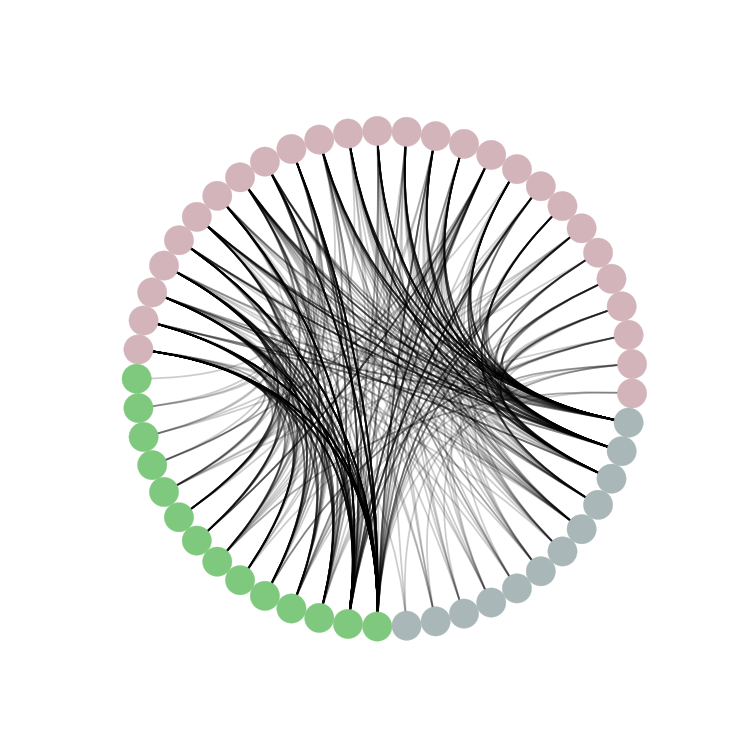

In [17]:
c = CircosPlot(G, node_order='degree_centrality', node_grouping='MEP', node_color='MEP')
c.draw()

In [18]:
plt.close()

I'm very pleased with the aesthetics of the nxviz circosplots, but I would need labels on the diagram for it to be really useful in this instance (something which is not implemented yet in the package). I'll explore other ways of visualizing the graph with matplotlib.

### Drawing with matplotlib

I need some rational way of laying out the nodes in the bipartite graph. I can fix the positions along the x-axis according to their frame, MEP, or EC status. I use the 'sorted' function to get the nodes listed alphabetically. 

In [53]:
pos = {}
pos.update( (n, (1, i*2.35)) for i, n in enumerate(sorted(mep_nodes)) ) # put nodes from mep_nodes at x=3, with more space between nodes on the y-axis
pos.update( (n, (2, i)) for i, n in enumerate(sorted(frame_nodes, reverse=True)) ) # put nodes from frame_nodes at x=2, reversing direction to get problems up top
pos.update( (n, (3, i*2)) for i, n in enumerate(sorted(ec_nodes)) ) # put nodes from ec_nodes at x=1, with more space on the y-axis

Here I assign colors also according to frame, MEP, or EC status. 

In [54]:
colors = []

for n in G.nodes:
    if n in mep_nodes:
        colors.append('red')
    elif n in ec_nodes:
        colors.append('blue')
    else:
        colors.append('gray')

This draws the nodes in three groupings and three colors along the x-axis and stacked alphabetically.

<IPython.core.display.Javascript object>


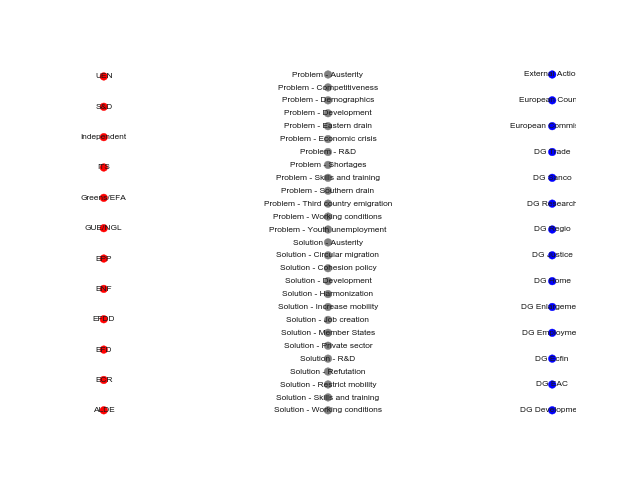

(0.89392646357605154,
 3.1060735364239487,
 -1.3081506332962078,
 27.308150633296204)

In [55]:
nx.draw_networkx_nodes(G,
                       node_size=30,
                       pos=pos,
                       node_color=colors)

plt.axis('off')

We can add labels with the code below. 

In [56]:
nx.draw_networkx_labels(G, pos, font_size=6)

{'ALDE': <matplotlib.text.Text at 0x15c6cca4c88>,
 'DG Development': <matplotlib.text.Text at 0x15c6e730d30>,
 'DG EAC': <matplotlib.text.Text at 0x15c6e4a62b0>,
 'DG Ecfin': <matplotlib.text.Text at 0x15c6d04f0b8>,
 'DG Employment': <matplotlib.text.Text at 0x15c6d098a90>,
 'DG Enlargement': <matplotlib.text.Text at 0x15c6e7497f0>,
 'DG Home': <matplotlib.text.Text at 0x15c6e764240>,
 'DG Justice': <matplotlib.text.Text at 0x15c6e737d30>,
 'DG Regio': <matplotlib.text.Text at 0x15c6e776780>,
 'DG Research': <matplotlib.text.Text at 0x15c6e48e2b0>,
 'DG Sanco': <matplotlib.text.Text at 0x15c6e764cc0>,
 'DG Trade': <matplotlib.text.Text at 0x15c6e77dcc0>,
 'ECR': <matplotlib.text.Text at 0x15c6e776cc0>,
 'EFD': <matplotlib.text.Text at 0x15c6e76c780>,
 'EFDD': <matplotlib.text.Text at 0x15c6e77d240>,
 'ENF': <matplotlib.text.Text at 0x15c6e77d780>,
 'EPP': <matplotlib.text.Text at 0x15c679299e8>,
 'European Commission': <matplotlib.text.Text at 0x15c6e749d30>,
 'European Council': <matp

In [57]:
plt.close()

I need three final figures - one with edges drawn for each stage of the policy debate. First I create three lists of edge tuples for each 'STAGE' entry in the edge list dictionary. 

In [58]:
stage_1 = [(u, v, d) for u, v, d in G.edges(data=True) if d['STAGE'] == 1]
stage_2 = [(u, v, d) for u, v, d in G.edges(data=True) if d['STAGE'] == 2]
stage_3 = [(u, v, d) for u, v, d in G.edges(data=True) if d['STAGE'] == 3]

We can use these lists to create three subgraphs.

In [59]:
# Subgraph for stage 1

G_1 = nx.MultiGraph()
G_1.add_nodes_from(G.nodes(data=True))
G_1.add_edges_from(stage_1)

# Subgraph for stage 2

G_2 = nx.MultiGraph()
G_2.add_nodes_from(G.nodes(data=True))
G_2.add_edges_from(stage_2)

# Subgraph for stage 3

G_3 = nx.MultiGraph()
G_3.add_nodes_from(G.nodes(data=True))
G_3.add_edges_from(stage_3)

[0,
 0,
 1,
 2,
 3,
 4,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 3,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 3,
 0,
 0,
 0,
 1,
 2,
 3,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 3,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Next, I compute degree centrality for each node in each subgraph.

In [60]:
degree_centrality_stage_1 = nx.bipartite.degree_centrality(G_1, organizations)
degree_centrality_stage_2 = nx.bipartite.degree_centrality(G_2, organizations)
degree_centrality_stage_3 = nx.bipartite.degree_centrality(G_3, organizations)

In [61]:
nx.set_node_attributes(G_1, degree_centrality_stage_1, 'degree_centrality_stage_1')
nx.set_node_attributes(G_2, degree_centrality_stage_2, 'degree_centrality_stage_2')
nx.set_node_attributes(G_3, degree_centrality_stage_3, 'degree_centrality_stage_3')

In [62]:
node_size_1 = [(degree_centrality_stage_1[node]) * 200 for node in G.nodes()]
node_size_2 = [(degree_centrality_stage_2[node]) * 200 for node in G.nodes()]
node_size_3 = [(degree_centrality_stage_3[node]) * 200 for node in G.nodes()]

<IPython.core.display.Javascript object>


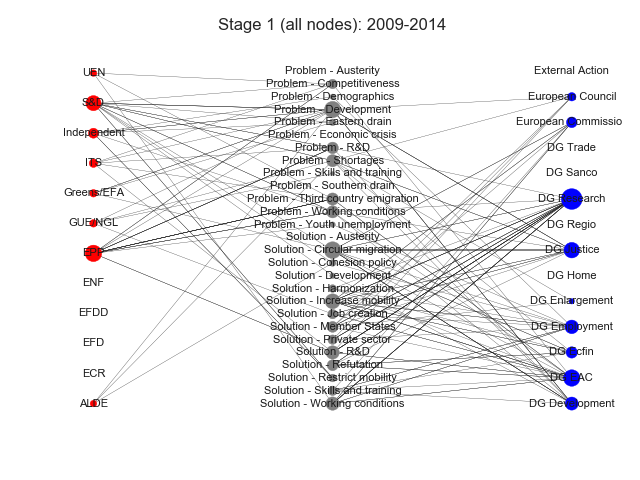

(0.79000000000000004, 3.21, -2.7142500000000007, 28.564250000000001)

In [63]:
nx.draw_networkx(G_1, pos, node_color=colors, font_size=8, width=0.2, node_size=node_size_1)
plt.title('Stage 1 (all nodes): 2009-2014')
plt.tight_layout()
plt.axis('off')

In [64]:
plt.close()

This is what the first stage looks like as a multigraph with all edges drawn. The picture is too cluttered. In the following, I proceed by just drawing the top 10 nodes determined by degree centrality and the links between them. This should provide a more legible picture. 

### Filtering most important nodes

Step 1: Find the top x degree centrality values. Set x by trial and error, checking each plot for legibility. I found x = 15 to be the best balance between information and legibility in my case. 

In [65]:
top_dc1 = sorted(degree_centrality_stage_1.values(), reverse=True)[:15]
top_dc2 = sorted(degree_centrality_stage_2.values(), reverse=True)[:15]
top_dc3 = sorted(degree_centrality_stage_3.values(), reverse=True)[:15]

Step 2: Find the nodes corresponding to those values. 

In [66]:
top_connected1 = [n for n, d in G_1.nodes(data=True) if d['degree_centrality_stage_1'] in top_dc1]
top_connected2 = [n for n, d in G_2.nodes(data=True) if d['degree_centrality_stage_2'] in top_dc2]
top_connected3 = [n for n, d in G_3.nodes(data=True) if d['degree_centrality_stage_3'] in top_dc3]

Step 3: Calculate subgraphs based on those node sets. 

In [67]:
G_1_top = G_1.subgraph(top_connected1)
G_2_top = G_2.subgraph(top_connected2)
G_3_top = G_3.subgraph(top_connected3)

Assigning colors to nodes in each new subgraph.

In [68]:
color_1 = []

for n in G_1_top.nodes:
    if n in mep_nodes:
        color_1.append('red')
    elif n in ec_nodes: 
        color_1.append('blue')
    else: 
        color_1.append('gray')
        
color_2 = []

for n in G_2_top.nodes:
    if n in mep_nodes:
        color_2.append('red')
    elif n in ec_nodes: 
        color_2.append('blue')
    else: 
        color_2.append('gray')
        
color_3 = []

for n in G_3_top.nodes:
    if n in mep_nodes:
        color_3.append('red')
    elif n in ec_nodes: 
        color_3.append('blue')
    else: 
        color_3.append('gray')

Adding weight to the links - first, creating an empty weight attribute for all edges. 

In [69]:
nx.set_edge_attributes(G_1_top, 0, 'weight') # create empty weight attribute
nx.set_edge_attributes(G_2_top, 0, 'weight')
nx.set_edge_attributes(G_3_top, 0, 'weight')

Importing the Counter() function to get sum of all edge pairs.

In [70]:
from collections import Counter
c1 = Counter(G_1_top.edges())  # gives you a dict with edges u,v and weight w as tuple (u,v,w) with w being the number of occurences of an edge
c2 = Counter(G_2_top.edges())
c3 = Counter(G_3_top.edges())

Assigning that sum to the weight attribute for each edge pair. 

In [71]:
for u, v, w in G_1_top.edges(data=True):
    w['weight'] = c1[u, v]
    
for u, v, w in G_2_top.edges(data=True):
    w['weight'] = c2[u, v]
    
for u, v, w in G_3_top.edges(data=True):
    w['weight'] = c3[u, v]

Looking at the list of edges below, we can see that each edge in the subgraph now has the correct weight attribute, but because we are still dealing with MultiGraphs, the first edge in the list with weight 2 is repeated 2 times, because each edge is retained and given the new summed weight attribute. This is a problem.

In [72]:
list(G_1_top.edges(data=True))[:5]

[('EPP',
  'Problem - Third country emigration',
  {'DATE': Timestamp('1999-02-11 00:00:00'),
   'STAGE': 1,
   'TEXT': 'Participation in international education and training on the one hand, and the demand from companies for qualified staff with international experience on the other, have stimulated interest in working abroad amongst young scientists. The USA is the principal destination of European emigrants, and most of them have executive and management posts. It should also be stressed that approximately 50 % of all Europeans who complete a degree in the USA remain in that country for a longer period, and even for good, with European Ph.Ds staying there much longer on average than their Korean or Japanese counterparts',
   'weight': 6}),
 ('EPP',
  'Problem - Third country emigration',
  {'DATE': Timestamp('2003-04-02 00:00:00'),
   'STAGE': 1,
   'TEXT': 'According to a recent Commission report, nearly 75 % of European PhD students in the United States envisage staying there afte

We can solve this by turning the MultiGraphs into simple graphs as thus: 

In [73]:
G_1_top_simple = nx.Graph(G_1_top)
G_2_top_simple = nx.Graph(G_2_top)
G_3_top_simple = nx.Graph(G_3_top)

If we check the edges on one of the new simple graphs, we can see that only one edge is retained between each node pair, correctly weighted.

In [74]:
list(G_1_top_simple.edges(data=True))[:5]

[('EPP',
  'Problem - Third country emigration',
  {'DATE': Timestamp('2008-11-19 00:00:00'),
   'STAGE': 1,
   'TEXT': 'Statistics show that the European Union produces more graduates in the pure sciences than the USA or Japan. Nevertheless, studies reveal that Europe is unable to retain its high percentage of graduate research scientists and that there is a ‘brain drain’ to countries outside the EU.',
   'weight': 6}),
 ('EPP',
  'Problem - Working conditions',
  {'DATE': Timestamp('2005-11-29 00:00:00'),
   'STAGE': 1,
   'TEXT': 'The main reasons which lead European scientists and engineers to live abroad are the quality of jobs, better prospects and projects and easier access to the latest technology',
   'weight': 3}),
 ('EPP',
  'Solution - R&D',
  {'DATE': Timestamp('2005-11-29 00:00:00'),
   'STAGE': 1,
   'TEXT': 'Do Community and national bodies provide sufficient financial support in order to promote the work of young researchers at university level and in higher-education 

Here I recalculate node sizes for the new subgraphs.

In [75]:
node_size_1_simple = [(degree_centrality_stage_1[node]) * 200 for node in G_1_top_simple.nodes]
node_size_2_simple = [(degree_centrality_stage_2[node]) * 200 for node in G_2_top_simple.nodes]
node_size_3_simple = [(degree_centrality_stage_3[node]) * 200 for node in G_3_top_simple.nodes]

The only thing remaining before plotting is to calculate an array of width values for each subgraph. We can proceed as we did when calculating the node sizes. 

In [76]:
width_1 = [G_1_top_simple[u][v]['weight'] / 2 for u,v in G_1_top_simple.edges]
width_2 = [G_2_top_simple[u][v]['weight'] / 2 for u,v in G_2_top_simple.edges]
width_3 = [G_3_top_simple[u][v]['weight'] / 2 for u,v in G_3_top_simple.edges]

<IPython.core.display.Javascript object>


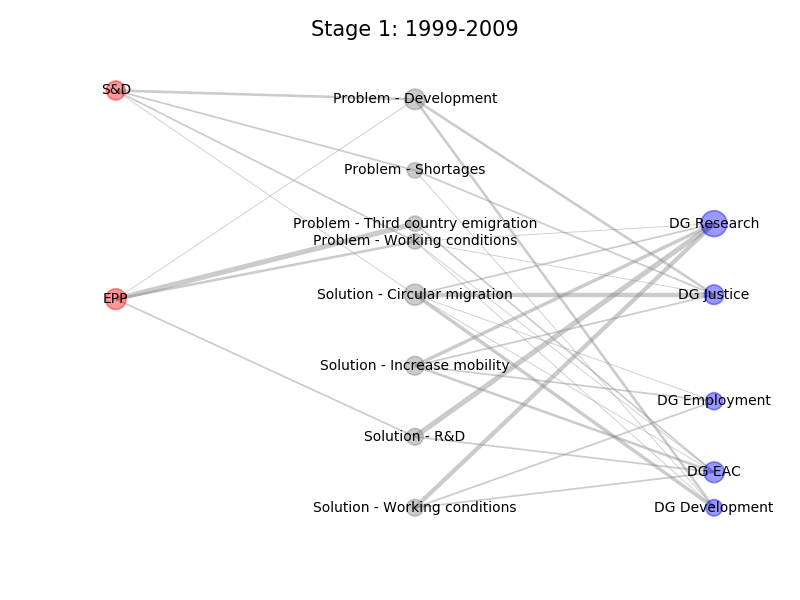

In [83]:
nx.draw_networkx(G_1_top_simple, pos, node_color=color_1, with_labels=False, width=width_1, node_size=node_size_1_simple, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(G_1_top_simple, pos, font_size=8)
plt.title('Stage 1: 1999-2009')
plt.tight_layout()
plt.axis('off')
plt.savefig('exports/bd_org_stage_1.pdf', format='pdf')

In [84]:
plt.close()

<IPython.core.display.Javascript object>


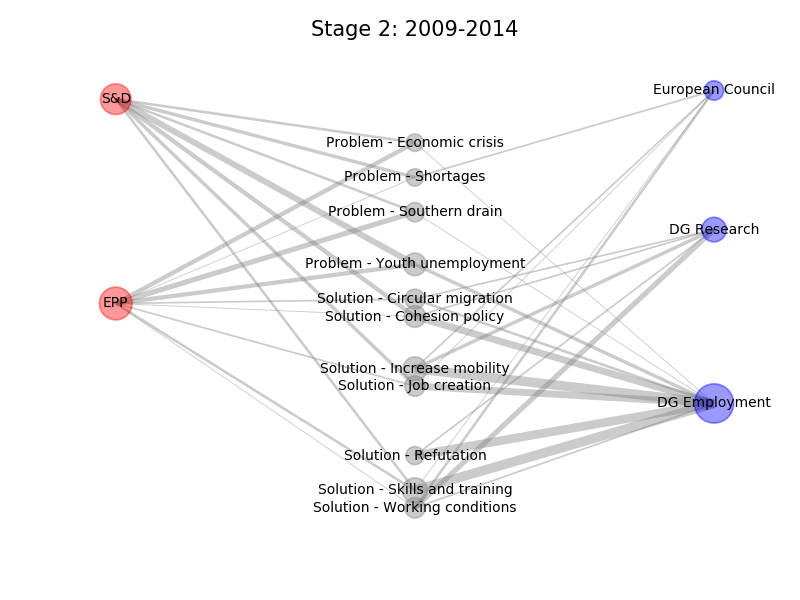

In [85]:
nx.draw_networkx(G_2_top_simple, pos, node_color=color_2, with_labels=False, width=width_2, node_size=node_size_2_simple, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(G_2_top_simple, pos, font_size=8)
plt.title('Stage 2: 2009-2014')
plt.tight_layout()
plt.axis('off')
plt.savefig('exports/bd_org_stage_2.pdf', format='pdf')

In [86]:
plt.close()

<IPython.core.display.Javascript object>


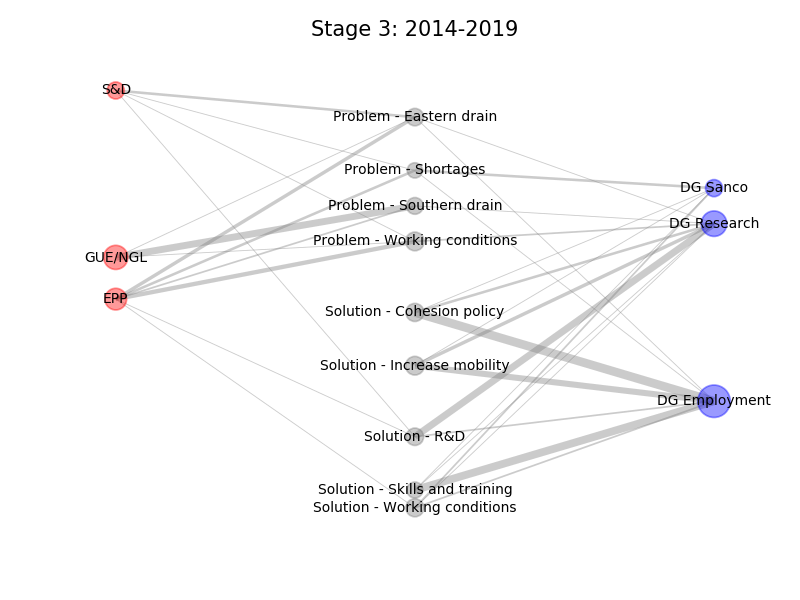

In [87]:
nx.draw_networkx(G_3_top_simple, pos, node_color=color_3, with_labels=False, width=width_3, node_size=node_size_3_simple, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(G_3_top_simple, pos, font_size=8)
plt.title('Stage 3: 2014-2019')
plt.tight_layout()
plt.axis('off')
plt.savefig('exports/bd_org_stage_3.pdf', format='pdf')

In [158]:
plt.close()

### Drawing as subplots

Creating all three figures as subplots. Two different methods: in the first one, I'm not sure how I can get proper aspect ratios on the three network diagrams. 

<IPython.core.display.Javascript object>


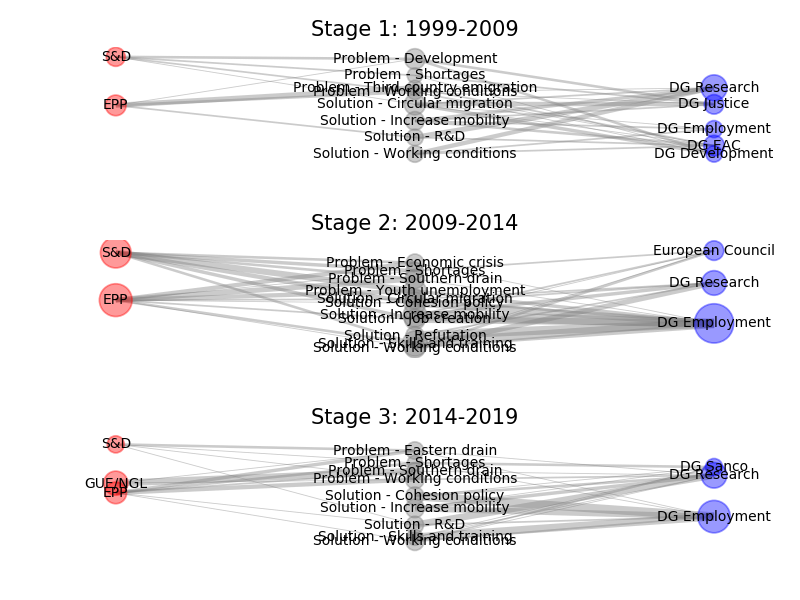

In [165]:
plt.subplot(3, 1, 1)
nx.draw_networkx(G_1_top_simple, pos, node_color=color_1, with_labels=False, width=width_1, node_size=node_size_1_simple, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(G_1_top_simple, pos, font_size=8)
plt.title('Stage 1: 1999-2009')
plt.axis('off')
plt.tight_layout()

plt.subplot(3, 1, 2)
nx.draw_networkx(G_2_top_simple, pos, node_color=color_2, with_labels=False, width=width_2, node_size=node_size_2_simple, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(G_2_top_simple, pos, font_size=8)
plt.title('Stage 2: 2009-2014')
plt.axis('off')
plt.tight_layout()

plt.subplot(3, 1, 3)
nx.draw_networkx(G_3_top_simple, pos, node_color=color_3, with_labels=False, width=width_3, node_size=node_size_3_simple, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(G_3_top_simple, pos, font_size=8)
plt.title('Stage 3: 2014-2019')
plt.axis('off')
plt.tight_layout()

In [166]:
plt.close()

The second method here produces a better result once you set the figheight variable to a large enough number. 

<IPython.core.display.Javascript object>


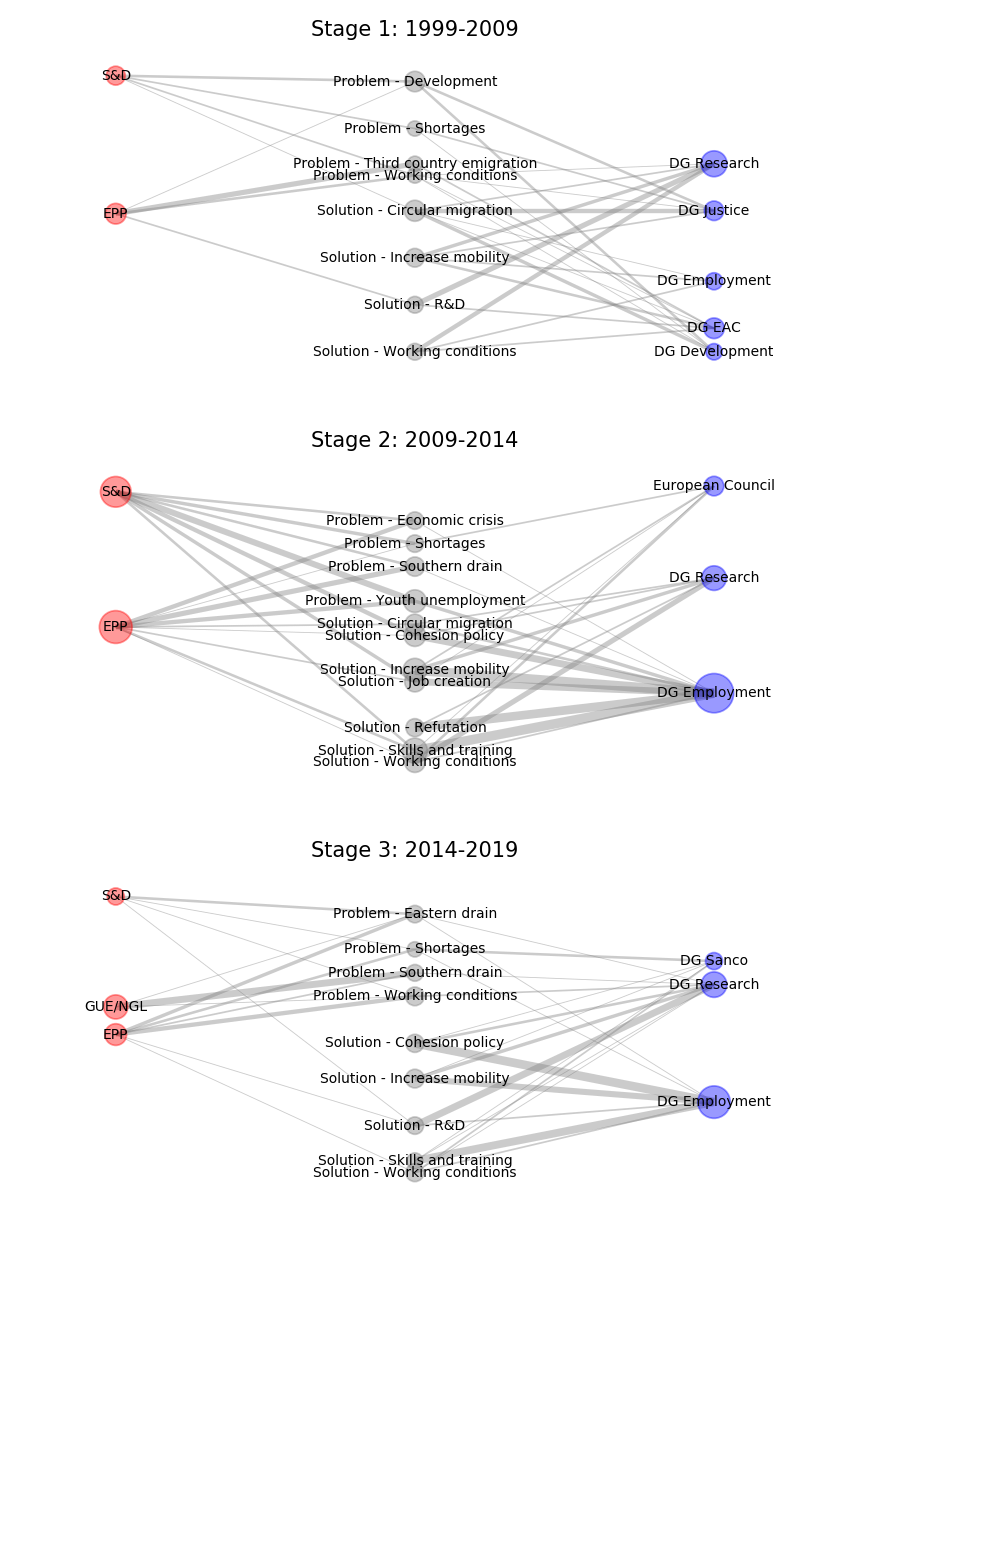

In [160]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=3)
f.set_figheight(10)

nx.draw_networkx(G_1_top_simple, pos, node_color=color_1, with_labels=False, width=width_1, node_size=node_size_1_simple, edge_color='gray', alpha=0.4, ax=ax1)
nx.draw_networkx_labels(G_1_top_simple, pos, font_size=8, ax=ax1)
ax1.axis('off')
ax1.set_title('Stage 1: 1999-2009')
plt.tight_layout()

nx.draw_networkx(G_2_top_simple, pos, node_color=color_2, with_labels=False, width=width_2, node_size=node_size_2_simple, edge_color='gray', alpha=0.4, ax=ax2)
nx.draw_networkx_labels(G_2_top_simple, pos, font_size=8, ax=ax2)
ax2.axis('off')
ax2.set_title('Stage 2: 2009-2014')
plt.tight_layout()

nx.draw_networkx(G_3_top_simple, pos, node_color=color_3, with_labels=False, width=width_3, node_size=node_size_3_simple, edge_color='gray', alpha=0.4, ax=ax3)
nx.draw_networkx_labels(G_3_top_simple, pos, font_size=8, ax=ax3)
ax3.axis('off')
ax3.set_title('Stage 3: 2014-2019')
plt.tight_layout()

plt.savefig('exports/bd_org_subplots.pdf', format='pdf')

In [167]:
plt.close()